## ДЗ Визуальный анализ данных

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Условие 1: Задача 1
Постройте график\
Назовите график\
Сделайте именование оси x и оси y\
Сделайте выводы

1.1. Скачать следующие данные: kc-house-data\
1.2. Изучите стоимости недвижимости\
1.3. Изучите распределение квадратуры жилой\
1.4. Изучите распределение года постройки


Данная промежуточная аттестация оценивается по системе "зачет" / "не зачет".\
"Зачет" ставится, если слушатель успешно выполнил 3 или 2 критерия.\
"Незачет" ставится, если слушатель успешно выполнил 1 или меньше критериев.

Критерии оценивания:\
- слушатель верно подгрузил данные в библиотеку\
- слушатель сформировал корректный график по данным\
- слушатель проанализировал данные и сделал корректный вывод\

In [5]:
df = pd.read_csv('/content/sample_data/kc_house_data.csv', sep = ',', encoding='latin-1')
df.isnull().sum().sum(), df.shape, df.columns

(0,
 (21613, 21),
 Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
        'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
        'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
        'lat', 'long', 'sqft_living15', 'sqft_lot15'],
       dtype='object'))

#### *Описание признаков:*
- id - Уникальный ID для каждого дома
- date - Дата продажи дома
- price - Стоимость продажи дома
- bedrooms - Кол-во спален
- bathrooms - Кол-во ванных комнат (0.5 - туалет без душа)
- sqft_living - Кв. метры жилые
- sqft_lot - Кв. метры общие
- floors - Кол-во этажей
- waterfront - Есть набержная или нет
- view - Значение от 0 до 4, насколько хороший вид
- condition - Значение от 1 до 5, насколько хорошее состояние
- grade - Значение от 1 до 13, где \
1 - 3 плохая конструкция здания и дизайн, \
7 - средний уровень конструкции и дизайна, \
11 - 13 - высокое качество конструкции и дизайна
- sqft_above - Кв. метры дома, которые находятся выше земли
- sqft_basement - Кв. метры дома, которые находятся ниже земли
- yr_built - Год постройки дома
- yr_renovated - Год ремонта дома
- zipcode - Индекс
- lat - Широта
- long - Долгота
- sqft_living15 - Кв. метры жилой площади у 15 соседей
- sqft_lot15 - Кв. метры общей площади у 15 соседей

### 1.2. Изучите стоимости недвижимости

In [175]:
round(df['price'].mean(),0)

540088.0

In [179]:
df['price'].describe()[['min','max',]]

min      75000.0
max    7700000.0
Name: price, dtype: float64

In [44]:
# Разбитие прайса на 5 уровней
df['price_slice'] = pd.cut(df['price'], bins=[75000, 1600000, 3125000, 4650000, 6175000, 7700000], labels=['низкий (75-1600K)', 'ниже среднего (1600-3125K)', 'средняя (3125-4650K)', 'выше среднего (4650-6175K)', 'высокая (6175-7700K)'])

In [45]:
data = pd.DataFrame({'Уровни цен на дома':df['price_slice'].value_counts()})
data

,Уровни цен на дома
низкий (75-1600K),21186
ниже среднего (1600-3125K),388
средняя (3125-4650K),30
выше среднего (4650-6175K),5
высокая (6175-7700K),3


In [46]:
data = pd.DataFrame({'Уровни цен на дома':df['price_slice'].value_counts()})
data2 = pd.DataFrame({'Уровни цен на дома':round(df['price_slice'].value_counts(normalize=True),3)})
data2

,Уровни цен на дома
низкий (75-1600K),0.980
ниже среднего (1600-3125K),0.018
средняя (3125-4650K),0.001
выше среднего (4650-6175K),0.000
высокая (6175-7700K),0.000


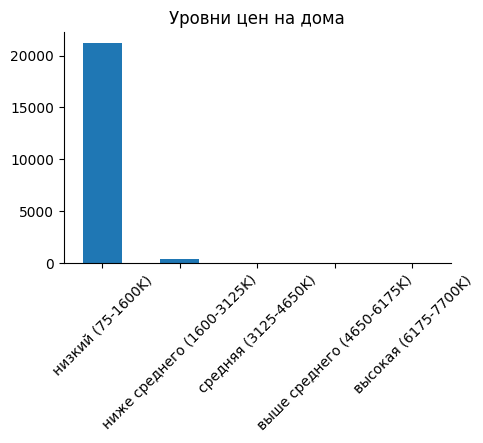

In [47]:
data['Уровни цен на дома'].plot(kind='bar', figsize=(5, 3), title='Уровни цен на дома')
plt.xticks(rotation = 45);
plt.gca().spines[['top', 'right']].set_visible(False)

Видим, что хоть и разброс цен на жилье большой min 75.000 - max 7.700.000 в основном 98% домов (21186шт) продаются в эконом сегменте: [75000 - 1600000]

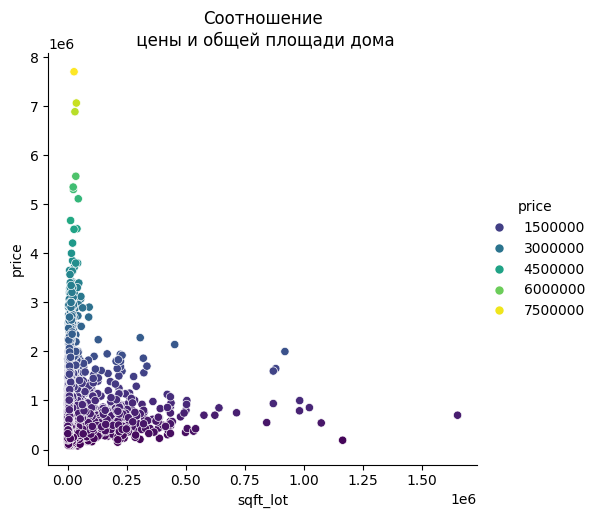

In [27]:
sns.color_palette('Spectral', as_cmap=True)
sns.relplot(x='sqft_lot', y='price', data = df, hue = 'price', palette = sns.palettes.color_palette('viridis', as_cmap=True)).set(title='Соотношение\n цены и общей площади дома');

график 1 - показывает соотношение цены и размера дома (кв.метры общие).\
Взаимосвязи нет.

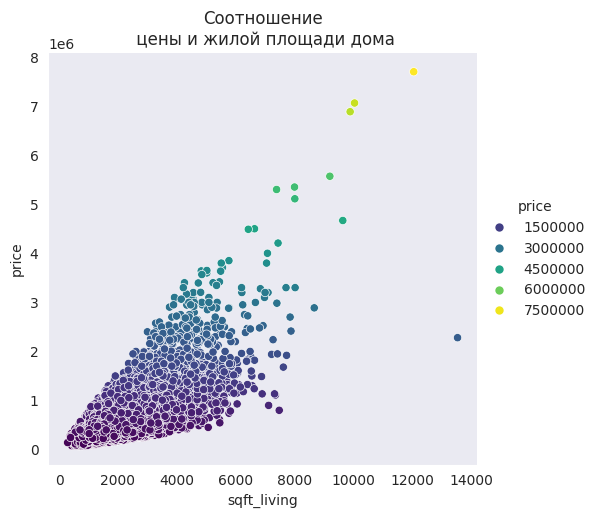

In [118]:
sns.relplot(x='sqft_living', y='price', data=df, hue = 'price', palette = sns.palettes.color_palette('viridis', as_cmap=True)).set(title='Соотношение\n цены и жилой площади дома');

график 2 - показывает соотношение цены и размера дома (кв.метры жилые).\
Найдена первая взаимосвязь: чем больше жилая площадь, тем дом дороже.

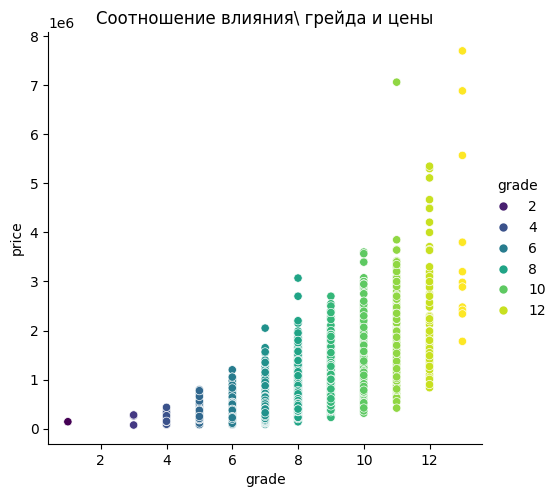

In [86]:
sns.relplot(x='grade', y='price', data=df, hue = 'grade', palette = sns.palettes.color_palette('viridis', as_cmap=True)).set(title='Соотношение влияния\ грейда и цены');

В основном жилая площадь один из наиболее главных факторов увеличения стоимости квартиры,
но главная характеристика, влияющая на цену - грейд.\
А именно самые дорогие дома с грейдом 11-13 - высокое качество конструкции и дизайна.
Это будет показано в разделе 3

### 1.3. Изучите распределение квадратуры жилой


In [266]:
round(df['sqft_living'].mean(),2)

2079.9

In [267]:
df['sqft_living'].describe()[['min','max',]]

min      290.0
max    13540.0
Name: sqft_living, dtype: float64

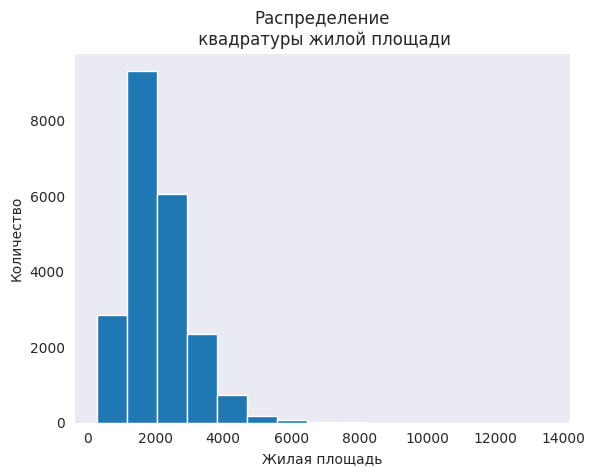

In [262]:
plt.hist(df['sqft_living'], bins=15)
plt.title('Распределение\n квадратуры жилой площади')
plt.figsize=(5, 3)
plt.xlabel('Жилая площадь')
plt.ylabel('Количество');

Разброс жилой площади домов очень большой min 290 max 13540, но основной % находится в площади в 1500-2500 квадратов. Также видны 2 блока площадей: 1500 - дома определеного архитектурного формата и судя по корреляции с таблицей этажности 1,5 этажные. Далее блок площадей более просторных домов с жилой площадью 2500. Дома больше 4000 скорее исключение.

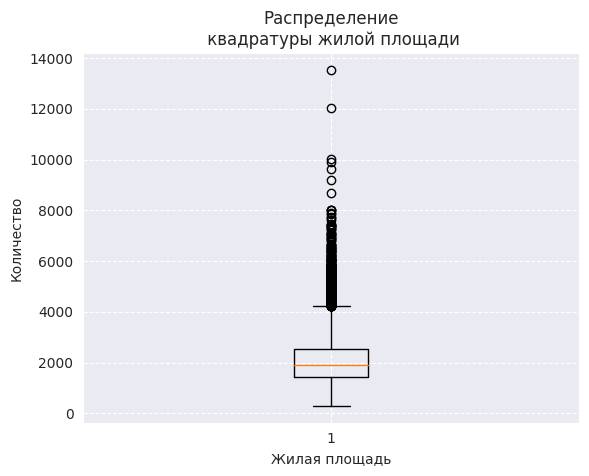

In [293]:
plt.boxplot(df['sqft_living'])
plt.title('Распределение\n квадратуры жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество')
plt.grid(color='white', linestyle='--', linewidth=0.8)

Выше выяснили, что разброс жилой площади домов очень большой min 290 max 13540, но основной % находится в площади в 1500-2500 квадратов. \
Здесь мы видим подтверждение и медиану площадей на уровне 2000. Также подтверждаются исклчения - дома. площадью более 4000

### 1.4. Изучите распределение года постройки

In [49]:
df['yr_built'].describe()[['min','max']]

min    1900.0
max    2015.0
Name: yr_built, dtype: float64

In [6]:
data4 = pd.DataFrame({'Распределение года постройки':df['yr_built'].value_counts()})
data4

,Распределение года постройки
2014,559
2006,454
2005,450
2004,433
2003,422
...,...
1933,30
1901,29
1902,27
1935,24


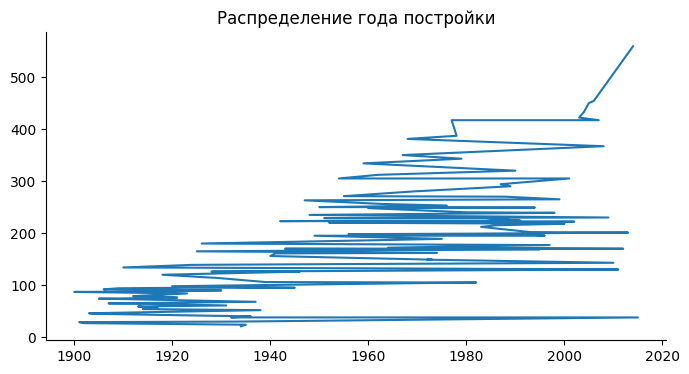

In [71]:
data4['Распределение года постройки'].plot(kind='line', figsize=(8, 4), title='Распределение года постройки')
plt.gca().spines[['top', 'right']].set_visible(False)

Разброс постройки домов большой от 1900 до 2015. Но большинство домов молодых.

Разобъем группу годов на категории:
- Молодые - XXI век 2000-е
- XX век до 1950
- Возрастные - 1900 - 1950

In [83]:
df['tens_age'] = df['yr_built'].apply(lambda year: 0 if year >= 2000 else (1 if year < 2000 and year > 1950 else 2))

<ipython-input-81-6dba30050989>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.countplot(x='tens_age', data = df).set(xlabel='', ylabel='Price', title='Number of Houses according to thier age',


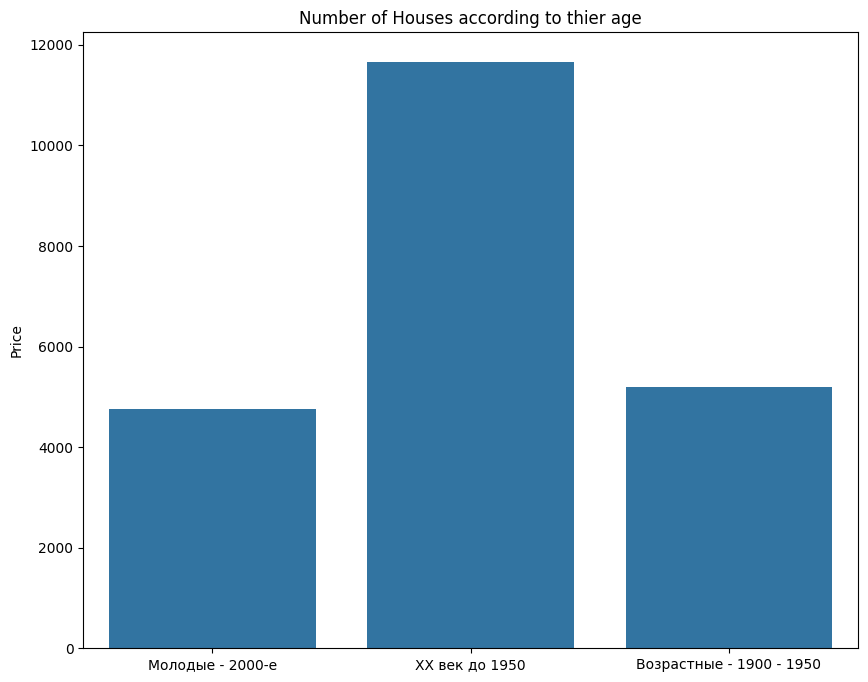

In [81]:
plt.figure(figsize=(10, 8))
sns.countplot(x='tens_age', data = df).set(xlabel='', ylabel='Price', title='Number of Houses according to thier age',
                                           xticklabels=['Молодые - 2000-е', 'XX век до 1950','Возрастные - 1900 - 1950']);

Домов XXI века и периода 1999 - середина XX века- примерно равные доли. Выделяется доля домов, построенный в период 1950-2000г - их значительно больше

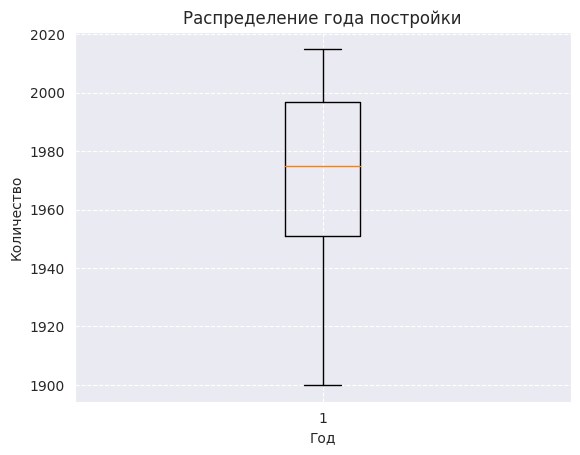

In [280]:
plt.boxplot(df['yr_built'])
plt.title('Распределение года постройки')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.grid(color='white', linestyle='--', linewidth=0.8)

### Условие 2: 2 задача
2.1. Изучите распределение домов от наличия вида на набережную\
Постройте график\
Сделайте выводы\
2.2. Изучите распределение этажей домов\
2.3. Изучите распределение состояния домов


### 2.1. Изучите распределение домов от наличия вида на набережную


In [162]:
data4 = pd.DataFrame({'Наличие набережной':df['waterfront'].value_counts()})
data4

,Наличие набережной
0,21450
1,163


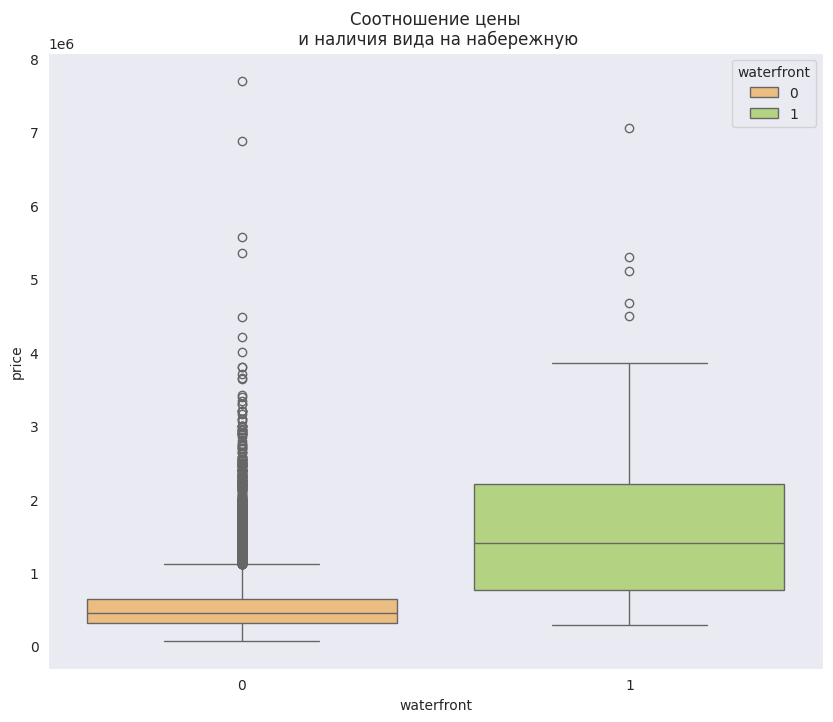

In [225]:
plt.figure(figsize = (10,8)), sns.boxplot(x = 'waterfront', y = 'price', data = df, hue = 'waterfront', palette = 'RdYlGn').set(title = 'Соотношение цены\n и наличия вида на набережную');

Соотношение цены и наличия вида на набережную лучше видно на графике коробка с усами, дома с видом на набережную на 1 порядок дороже, но не в несколько раз.

### 2.2. Изучите распределение этажей домов


In [167]:
data4 = pd.DataFrame({'Количество этажей':df['floors'].value_counts()})
data4

,Количество этажей
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


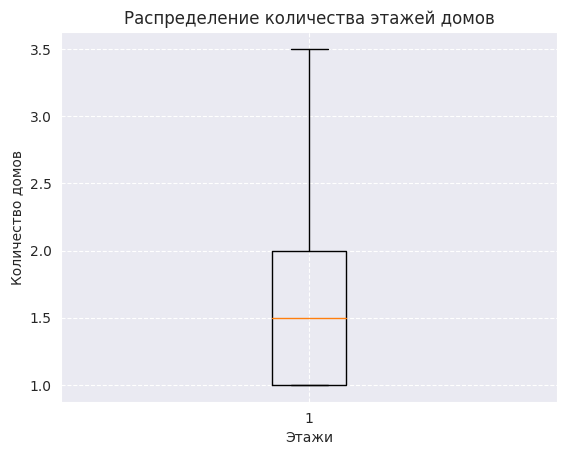

In [292]:
plt.boxplot(df['floors'])
plt.title('Распределение количества этажей домов')
plt.xlabel('Этажи')
plt.ylabel('Количество домов')
plt.grid(color='white', linestyle='--', linewidth=0.8)

Мы видим что основная масса домов в данных: 1 и 2 этажные, медиана находится на 1,5 этажах (скорее всего речь о архитектурном стиле California Bungalow - дом с подвалом, выступающим над уровнем земли, первый этаж находится на высоте 0.5-1.2м, вход с крыльцом-лестницей)

### Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.\
Анализ сделайте в формате storytelling:\
дополнить каждый график письменными выводами и наблюдениями.


##1. Самые важные корреляции к цене у признаков

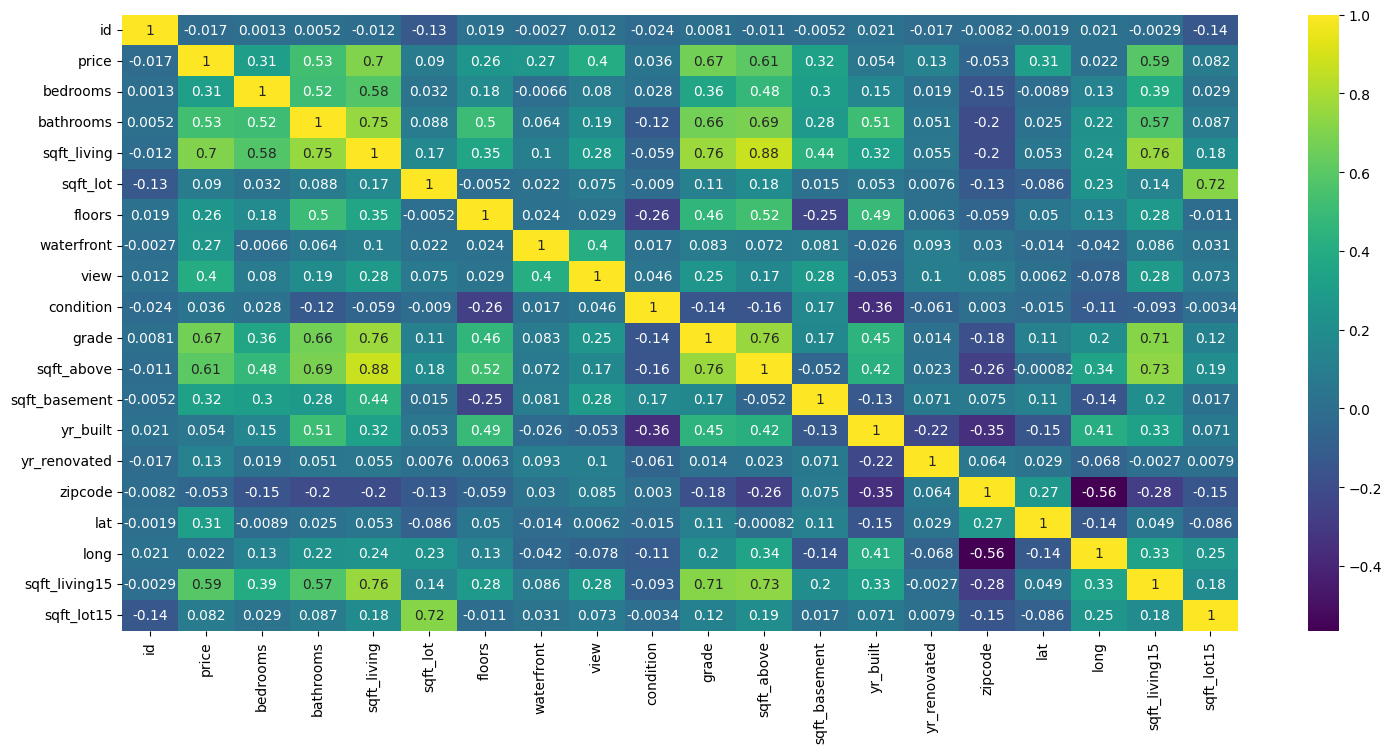

In [28]:
plt.figure(figsize=(18,8));
sns.heatmap(df.drop(columns =['date']).corr(),annot=True, cmap='viridis');

Самые важные корреляции к цене у признаков:
по пунктам
1. цена / жилая площадь,
2. цена / грейд,
3. цена / минимальная площадь подвала в % к общ площади дома,
4. однородные дома в районе (sqft_living15) и, скорее всего, однородный социум, так как лидирует признак именно дома с жилой площадью 15 соседей, а не общей,
5. цена / кол-во ванных комнат,
6. вид, широта latitude итолько далее наличие набережной, этажность, кол-во спален


- На цену не влияют признаки
 - состояние дома,
 -общая площадь,
 -год постройки.

## 2. О грейде: соотношение цены и размера дома (кв.метры жилые).

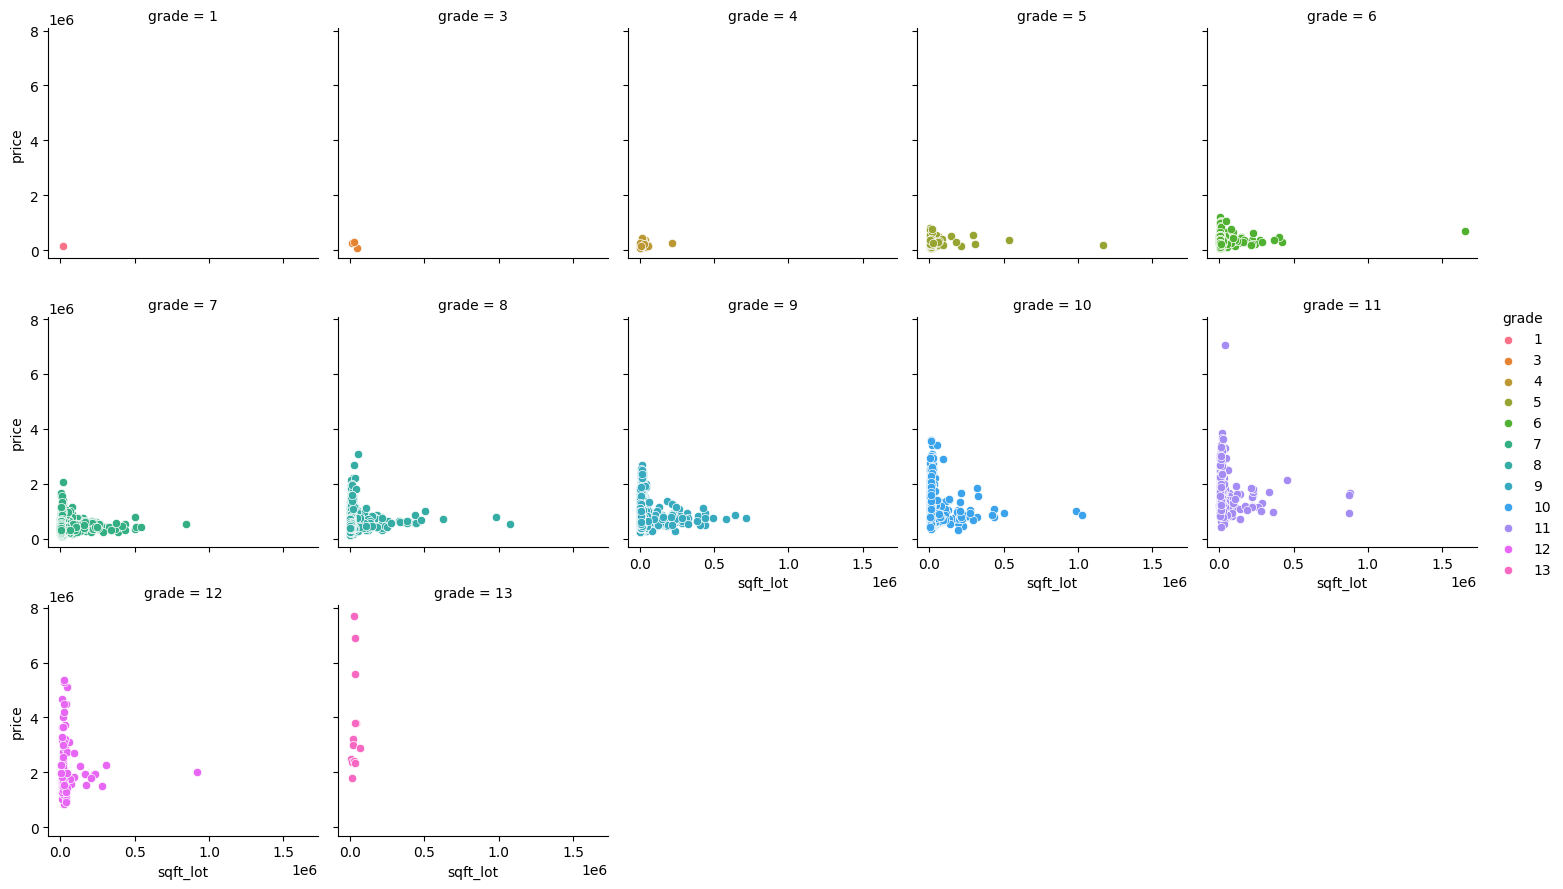

In [84]:
grid = sns.FacetGrid(df, col="grade", hue="grade", col_wrap=5)
grid.map(sns.scatterplot, "sqft_lot", "price")
grid.add_legend();

Характеристика, напрямую влияющая на цену - грейд.
А именно самые дорогие дома с грейдом 11-13 - высокое качество конструкции и дизайна. Это будет показано в разделе 3

## 3. Соотношение цены и размера дома (кв.метры жилые).


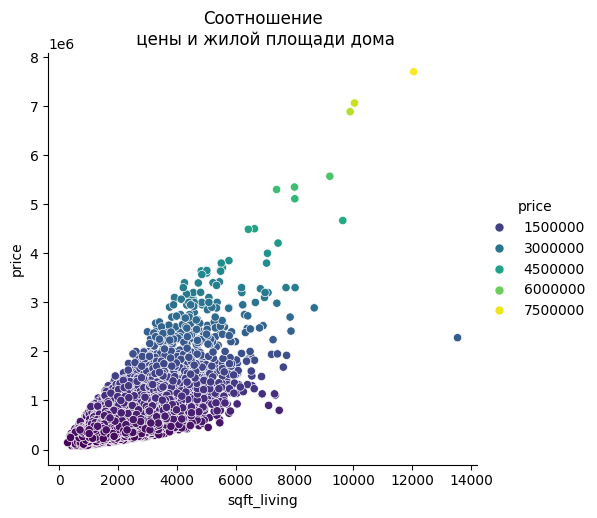

In [29]:
sns.relplot(x='sqft_living', y='price', data=df, hue = 'price', palette = sns.palettes.color_palette('viridis', as_cmap=True)).set(title='Соотношение\n цены и жилой площади дома');

Жилая площадь дома имеет высокую взаимосвязь с ценой. Чем больше жилая площадь, тем дом дороже. Часть домов с очень большой площадью - вне модели

##4. Этажность / цена - корреляция:


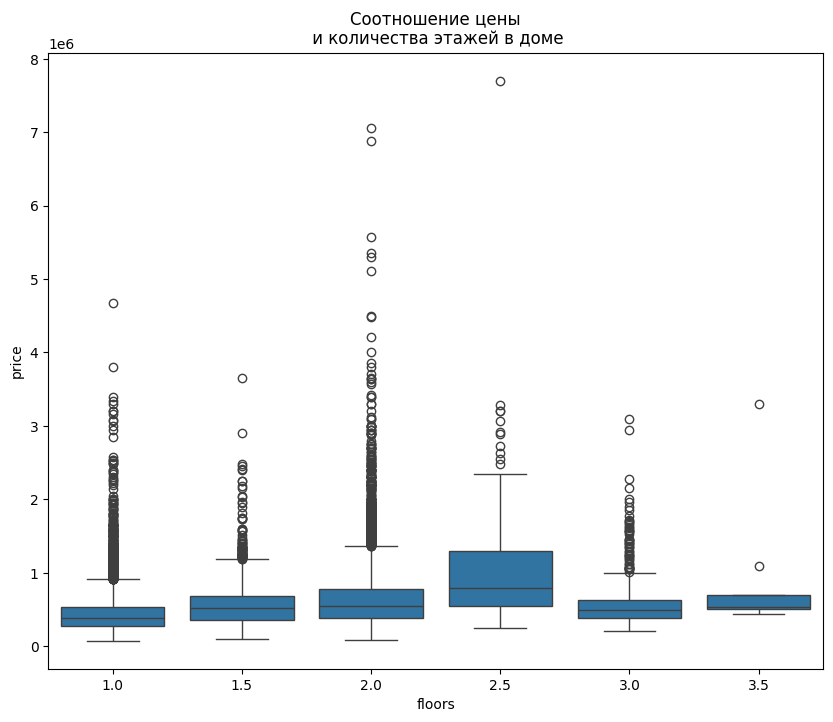

In [92]:
plt.figure(figsize = (10,8))
sns.boxplot(x = 'floors', y = 'price',data = df).set(title='Соотношение цены\n и количества этажей в доме');

Видим, что наиболее оцененные - дома 2,5 этажные (2-этажные с подвалом).

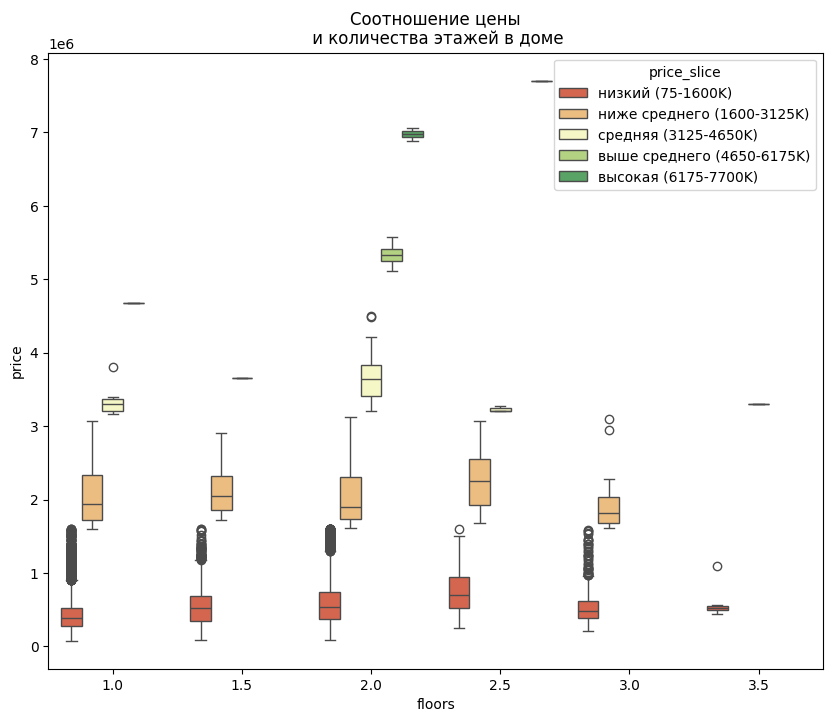

In [91]:
plt.figure(figsize = (10,8))
sns.boxplot(x = 'floors', y = 'price',data = df, hue='price_slice', palette='RdYlGn').set(title='Соотношение цены\n и количества этажей в доме');

####воспользуемся ранее созданным признаком разделения массива цен: price_slice и увидем более полную картину
Выделяются закономерности: \
Масса цен домов с 2 этажами наибольшая и стоят они 1600-3125K .

На 2 месте по объему ценовых предложений 1 этажные дома.\
1 этажные дома наиболее недорогие - все в сегменте 75 - 1600K

Все дорогие дома не менее 2 -2,5 этажей


## 5. Проанализируем признак: соотношение спален в доме и его цены
он имеет, который имеет средний ранг влияние на стоимость дома

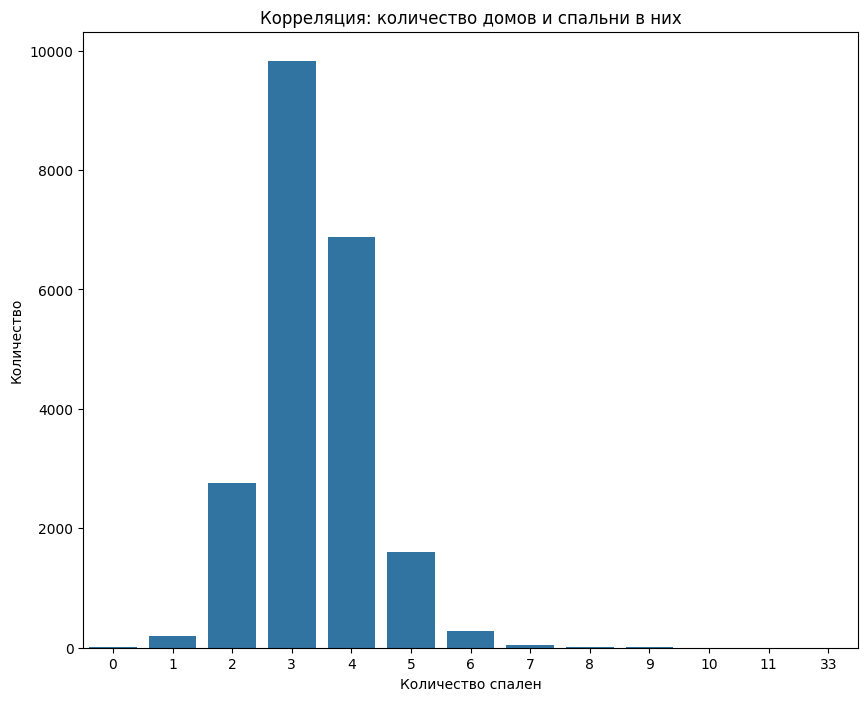

In [34]:
plt.figure(figsize=(10, 8))
sns.countplot(x = 'bedrooms', data = df ).set(ylabel = 'Количество', title='Корреляция: количество домов и спальни в них', xlabel='Количество спален');

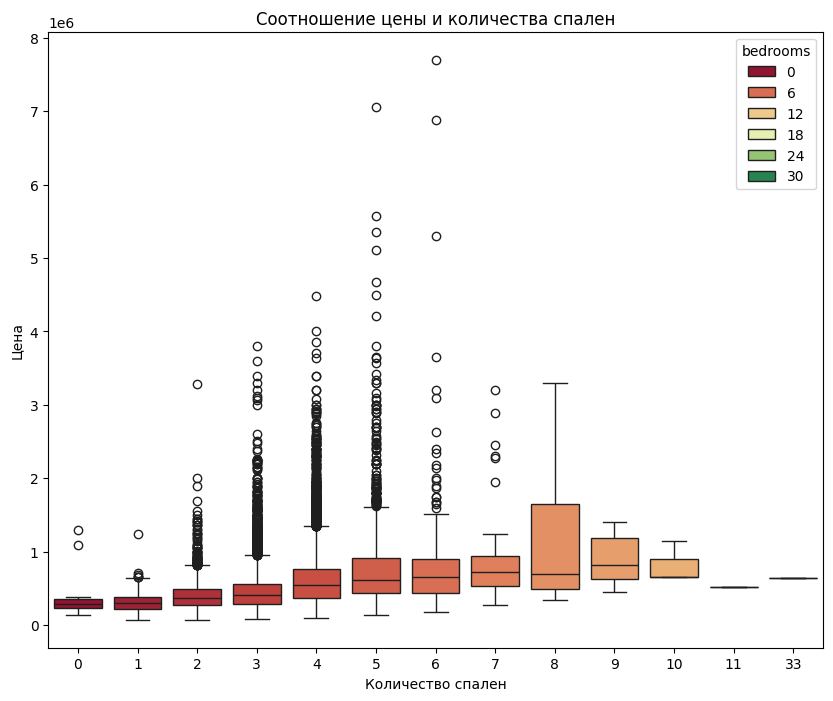

In [90]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'bedrooms', y = 'price', data = df, hue = 'bedrooms', palette='RdYlGn').set(xlabel='Количество спален', ylabel='Цена', title='Соотношение цены и количества спален');

Количество спален имеет средний ранг влияния и распределение близко к равномерному, кроме, по-видимому, дизайнирских домов с 8 спальнями. Медианная стоимость находится на отметке

##6. Пример неравномерного распредления (незначимый признак)

Соотношение цены и года постройки почти не взаимосвязаны

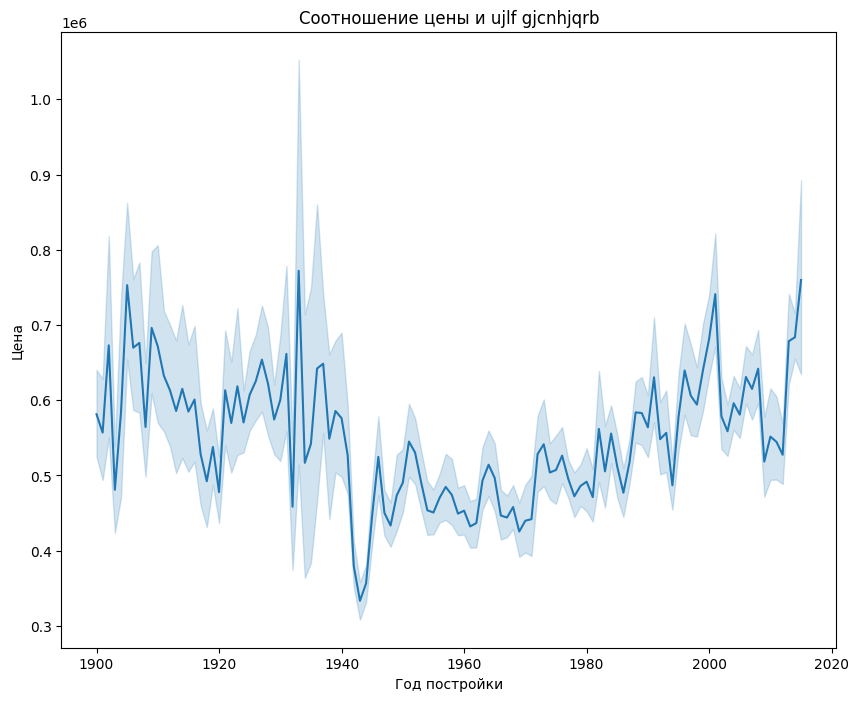

In [59]:
plt.figure(figsize=(10, 8))
sns.lineplot(x = 'yr_built', y = 'price', data = df).set(xlabel='Год постройки', ylabel='Цена', title='Соотношение цены и года постройки');